In [34]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

In [43]:
import pims
import pySPM as spm 
import trackpy as tp
import glob
from itertools import chain

#@pims.pipeline
#def gray(image):
#    return image[:, :, 1]  # Take just the green channel
#frames = gray(pims.open('../track_molecules/*.bmp'))

class SXMReader(pims.FramesSequence):
    def __init__(self, filenames):
        self.filenames = filenames
        self.scans = [spm.SXM(filename) for filename in self.filenames]
        self.z_data = np.array([s.get_channel("Z").correct_plane().pixels for s in self.scans])
        min_z = np.min(self.z_data)
        max_z = np.max(self.z_data)
        self.z_data -= min_z
        self.z_data /= max_z-min_z
        self._len = len(self.z_data)
        self._dtype = self.z_data.dtype
        self._frame_shape = self.z_data[0].shape
        self.scan_size = self.scans[0].size
        self.meters_per_pixel = self.scan_size['real']['x']/self.scan_size['pixels']['x']
       
    def get_frame(self, i):
        # Access the data you need and get it into a numpy array.
        # Then return a Frame like so:
        return pims.Frame(self.z_data[i], frame_no=i)

    def __len__(self):
        return self._len

    @property
    def frame_shape(self):
        return self._frame_shape

    @property
    def pixel_type(self):
        return self._dtype

n_range = range(616, 666)
N = len(n_range)
SXM_PATH = ["electromigration_13/Image_{0:03}.sxm".format(i) for i in n_range]
frames = SXMReader(SXM_PATH)
molecule_size = 5
min_mass = 0.5
min_size = 0.5
max_ecc = 0.3
sep = 3


base_filename = "electromigration_13_{0:03}-{1:03}".format(n_range[0],n_range[-1])
OUTPUT = "./molecule_density_data/"

#print(frames[0])
    
#plt.imshow(frames[7])

In [44]:
f = tp.batch(frames[:], molecule_size, separation=sep, minmass=0.3)
#tp.quiet()  # Turn off progress reports for best performance
plt.figure()

for i,frame in enumerate(frames):
    print(i)
    tp.annotate(f[f['frame']==i], frame, plot_style={'markersize': 3})

Frame 49: 200 features
0


KeyboardInterrupt: 

In [48]:
x = np.arange(-60, 65, 5)
SIZE = (frames.scan_size['real']['x'] * 1e2) * (frames.scan_size['real']['y'] * 1e2)
#f1 = f.groupby('frame').size().reindex(range(N), fill_value=0) / SIZE
#f2 = f.groupby('frame').size().reindex(range(N), fill_value=0) / SIZE
f1 = f.groupby('frame').size().reindex(range(N), fill_value=0)[0:25].iloc[::1] / SIZE
f2 = f.groupby('frame').size().reindex(range(N), fill_value=0)[25:50].iloc[::-1] / SIZE
#f3 = f.groupby('frame').size().reindex(range(N), fill_value=0)[25:50].iloc[::-1] / SIZE
#f4 = f.groupby('frame').size().reindex(range(N), fill_value=0)[50:75] / SIZE
#x2 = [i for i in range(60, -65, -10)]
#SIZE2 = (100 * 1e-7)**2
#g1 = f.groupby('frame').size()[101:114] / SIZE2
#g2 = f.groupby('frame').size()[114:127].iloc[::-1] / SIZE2
#g3 = f.groupby('frame').size()[127:140] / SIZE2
#f4 = f.groupby('frame').size()[140:153].iloc[::-1] / SIZE

In [49]:
f1

frame
0     7.240000e+12
1     7.520000e+12
2     7.480000e+12
3     7.520000e+12
4     6.880000e+12
5     6.200000e+12
6     5.680000e+12
7     5.000000e+12
8     4.440000e+12
9     3.920000e+12
10    3.440000e+12
11    2.720000e+12
12    2.640000e+12
13    1.920000e+12
14    1.480000e+12
15    8.000000e+11
16    8.000000e+10
17    8.000000e+10
18    8.000000e+10
19    8.000000e+10
20    8.000000e+10
21    4.000000e+10
22    4.000000e+10
23    4.000000e+10
24    4.000000e+10
dtype: float64

./molecule_density_data/electromigration_13_616-665.png


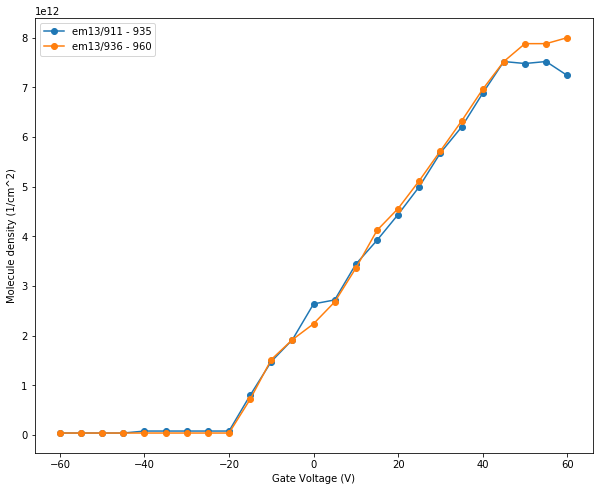

In [50]:
plt.figure(figsize=(10,8))
plt.plot(x[::-1], f1,'o-',label='em13/911 - 935')
plt.plot(x[::-1], f2,'o-',label='em13/936 - 960')
#plt.plot(x, f3,'o-',label='3, up')
#plt.plot(x[:12], f4,'o-',label='4, down')
#plt.plot(x, f5,'o-',label='5, down')
plt.legend()
#plt.plot(x2, g1)
#plt.plot(x2, g2)
#plt.plot(x2, g3)
#plt.plot(x2, g4)
# plt.title(SXM_PATH[0] + " to {}".format(n_range[-1]))
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Molecule density (1/cm^2)')
plt.savefig(OUTPUT + base_filename+'.png')
print(OUTPUT + base_filename+'.png')

In [51]:
#from numpy import savetxt
#base_filename = "molecule_density_data/electromigration_13_616-640"
#savetxt(base_filename+'.csv', np.column_stack([x, f1, f2]), delimiter=',')

In [ ]:
range(48)

In [ ]:
N

In [ ]:
f1

In [ ]:
f1+[0,41,49,50,42,30,8,1,1,0,0,0,0]

In [ ]:
times = [0,1,1,5,5,10,10,10,10,30,30,30,50,100,180]
uncounted=[0,41,49,50,42,30,8,1,1,0,0,0,0,0,0]
ctimes = np.cumsum(times)
plt.semilogx(ctimes,(f1+uncounted)/SIZE,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
times = range(N)
plt.plot(times,f1,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
len(f1)

In [ ]:
times = np.arange(0.5,19,0.5)
ctimes = np.cumsum(times)
plt.plot(ctimes,f1,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
f1*SIZE